# Examples `copulabayesnet`


## Example 1: --

## Example 2: Plot temporal results

Load packages 


In [85]:
from copulabayesnet import bncopula as bc
from copulabayesnet.data_preprocessor import CorrMatrix 
from copulabayesnet import cop_plot as cp
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

The following dataset is used:
https://archive.ics.uci.edu/ml/machine-learning-databases/00554/. Note that unaltered, this dataset is usually not a good case for a Bayesian network, as there can be structural changes.

_Hoseinzade, E., & Haratizadeh, S. (2019). CNNpred: CNN-based stock market prediction using a diverse set of variables. Expert Systems with Applications, 129, 273-285._

In [48]:
data_folder = r"../../data/copulabayesnet/CNNpred"

directory = os.fsencode(data_folder)
count = True
for file in os.listdir(directory):
     
    filename = os.fsdecode(file)
    singledata = pd.read_csv(data_folder+'/'+filename)
    name = filename[10:13]
    
    if count:
        data = pd.DataFrame(singledata['Date'])
        count = False    
             
    data[name] = singledata['Close']
data.index = data['Date']
data.index = pd.to_datetime(data.index)
data = data.drop(columns = ['Date'])

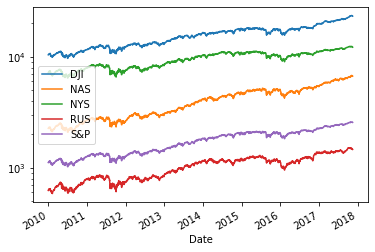

In [53]:
data.plot()
plt.yscale("log")

print data

In [54]:
data

,DJI,NAS,NYS,RUS,S&P
Date,,,,,
2009-12-31,10428.049805,2269.149902,7184.959961,625.390015,1115.099976
2010-01-04,10583.959961,2308.419922,7326.740234,640.099976,1132.989990
2010-01-05,10572.019531,2308.709961,7354.870117,638.489990,1136.520020
2010-01-06,10573.679688,2301.090088,7377.700195,637.950012,1137.140015
2010-01-07,10606.860352,2300.050049,7393.930176,641.969971,1141.689941
...,...,...,...,...,...
2017-11-09,23461.939453,6750.049805,12339.660156,1475.020020,2584.620117
2017-11-10,23422.210938,6750.939941,12322.599609,1475.270020,2582.300049
2017-11-13,23439.699219,6757.600098,12316.820313,1475.069946,2584.840088


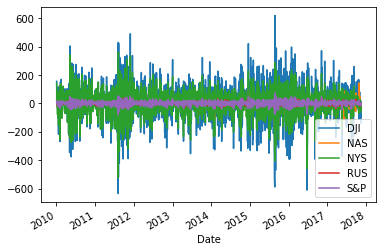

In [56]:
data.diff().plot()


In [57]:
data.diff().corr(method='spearman', min_periods=1)

,DJI,NAS,NYS,RUS,S&P
DJI,1.000000,0.825282,0.931518,0.804862,0.951029
NAS,0.825282,1.000000,0.847472,0.881232,0.916664
NYS,0.931518,0.847472,1.000000,0.874384,0.967130
RUS,0.804862,0.881232,0.874384,1.000000,0.873616
S&P,0.951029,0.916664,0.967130,0.873616,1.000000


## Ratio difference 
And save to file to use in Uninet

In [70]:
pd_data = data.pct_change()
pd_data = pd_data.drop(pd_data.index[0], axis=0)
pd_data = pd_data.rename(columns = {'S&P':'SP'})
pd_data.to_csv('../../data/copulabayesnet/processed_stock.csv', index=False)
pd_data

,DJI,NAS,NYS,RUS,SP
Date,,,,,
2010-01-04,0.014951,0.017306,0.019733,0.023521,0.016043
2010-01-05,-0.001128,0.000126,0.003839,-0.002515,0.003116
2010-01-06,0.000157,-0.003300,0.003104,-0.000846,0.000546
2010-01-07,0.003138,-0.000452,0.002200,0.006301,0.004001
2010-01-08,0.001068,0.007443,0.004249,0.004034,0.002882
...,...,...,...,...,...
2017-11-09,-0.004304,-0.005755,-0.003638,-0.004528,-0.003762
2017-11-10,-0.001693,0.000132,-0.001383,0.000169,-0.000898
2017-11-13,0.000747,0.000987,-0.000469,-0.000136,0.000984


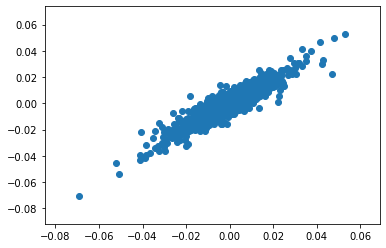

In [72]:
# Example
plt.scatter(data.pct_change()['NAS'], data.pct_change()['NYS']);

## Now make a model in Uninet

In [116]:
cm = CorrMatrix("example_matrix_stock.txt")

pred = bc.Predict(pd_data.values.T, [0], R = cm.R)

# Test with the Gaussian mixture model (mixed gaussians  = 'mg')
res1 = pred.bn(fit_func = 'mg', n = 500, numpars = 3, conf_int = 0.9)

Calculating took 25.432387351989746 seconds


(array([[ 0.01443807],
        [ 0.00370222],
        [ 0.0012168 ],
        ...,
        [ 0.00103952],
        [-0.0020565 ],
        [-0.0054966 ]]),
 array([[[ 0.01103421,  0.01796542]],
 
        [[ 0.00133899,  0.00746568]],
 
        [[-0.0008385 ,  0.0036592 ]],
 
        ...,
 
        [[-0.00107833,  0.00342195]],
 
        [[-0.00461748,  0.00020039]],
 
        [[-0.01019208, -0.00213399]]]))

What is the Nash-Sutcliffe efficiency? (Hydrologic parameter)

In [117]:
pred.nse()

0.9481326272404066

c:\users\sgnodde\documents\git\copulabayesnet\src\copulabayesnet\cop_plot.py:549: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


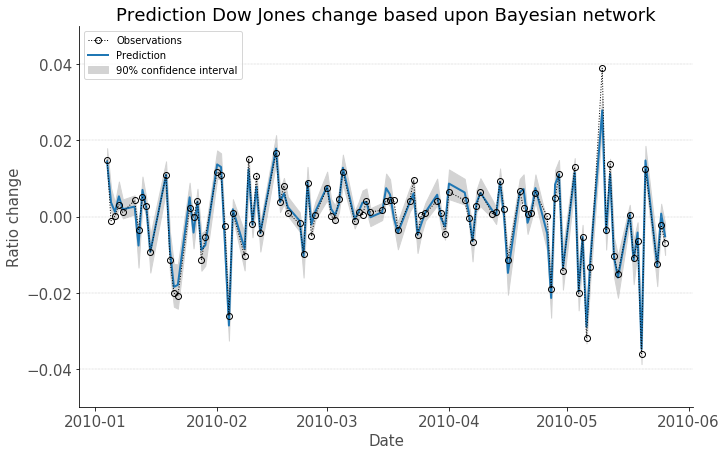

In [121]:
indmin, indmax = (0,100)
cp.pred_target(pred.prediction[0][indmin:indmax],
               pred.target[0][indmin:indmax], 
               dates = pd_data.index[indmin:indmax], 
               confidence_interval = pred.conf_int[indmin:indmax,0],
               data_name = 'Ratio change',
               title = 'Prediction Dow Jones change based upon Bayesian network',
               conflabel = '90% confidence interval'
              );
plt.ylim(-0.05, 0.05);
plt.savefig("prediction_dow.png", dpi = 200) #Note: savefig also possible cp.pred_target

(100, 2)

In [ ]:
#TODO compare with multiple lin regr